In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
FNIRSDATA = pd.read_csv('./../input/blueberry/jdc11mins.csv')
FNIRSDATA = FNIRSDATA.iloc[50:]

HbO2 = FNIRSDATA['HbO2'][ FNIRSDATA['HbO2'].notna() ]

In [27]:
np.shape(FNIRSDATA['HbO2'])

(3297,)

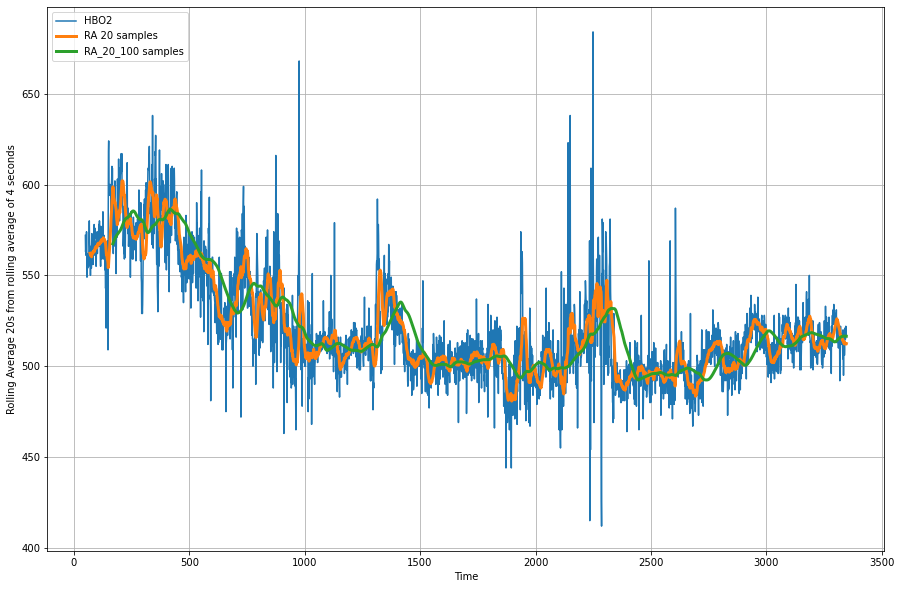

In [19]:
#DATA ANALYSIS#
# calculate rolling window of 100 samples or 20 seconds at 5Hz, 20 seconds and 4 seconds
FNIRSDATA['RA_20']     = FNIRSDATA.HbO2.rolling(20).mean().shift()   # 4 seconcds
FNIRSDATA['RA_100']    = FNIRSDATA.HbO2.rolling(100).mean()         # 20 seconds
FNIRSDATA['RA_20_100'] = FNIRSDATA.RA_20.rolling(100).mean()
FNIRSDATA['RA_20'].head(12)

FNIRSDATA['STD_20']          = FNIRSDATA.HbO2.rolling(20).std().shift()
FNIRSDATA['STD_100']         = FNIRSDATA.HbO2.rolling(100).std()
FNIRSDATA['STD_20_100']      = FNIRSDATA.STD_20.rolling(100).std()
FNIRSDATA['STD_DIFF_20_100'] = FNIRSDATA['STD_20'] - FNIRSDATA['STD_100']
FNIRSDATA['STD_DIFF_MEAN']   = FNIRSDATA.STD_DIFF_20_100.rolling(100).mean()

# #DATA PLOTS AVERAGES#
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(FNIRSDATA['HbO2'],label='HBO2')
plt.plot(FNIRSDATA['RA_20'], label='RA 20 samples', lw = 3)
plt.ylabel('Rolling Average 5s')
plt.xlabel('Time')
plt.legend(loc=2)

# #DATA PLOTS AVERAGES#
#plt.figure(figsize=(15,10))
plt.grid(True)
#plt.plot(FNIRSDATA['HbO2'],label='HBO2')
plt.plot(FNIRSDATA['RA_20_100'], label="RA_20_100 samples", lw = 3)
plt.ylabel('Rolling Average 20s from rolling average of 4 seconds')
plt.xlabel('Time')
plt.legend(loc=2)

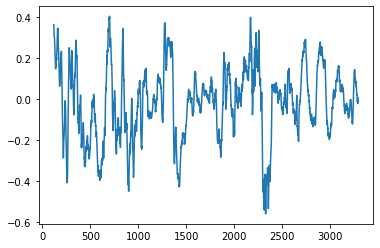

In [25]:
plt.plot(np.diff(FNIRSDATA['RA_20_100']))